# Exploration des données 

In [1]:
import pandas as pd
metadata_fichier = pd.read_csv("./data/metadonnees_ESLO2_ENT_ENTJEUN.csv")

<Axes: xlabel='sexe'>

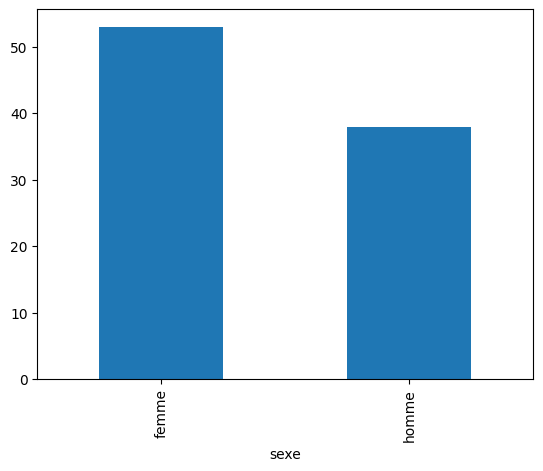

In [2]:
import matplotlib.pyplot as plt
metadata_fichier['sexe'].value_counts().plot(kind='bar')

In [3]:
# Rajout colonne classe_age
def class_age(age):
	if age == 'vieux': 
		return 3
	elif int(age) < 30:
		return 1
	elif int(age) > 60:
		return 3
	else:
		return 2
	
metadata_fichier['classe_age'] = metadata_fichier['age'].apply(class_age)

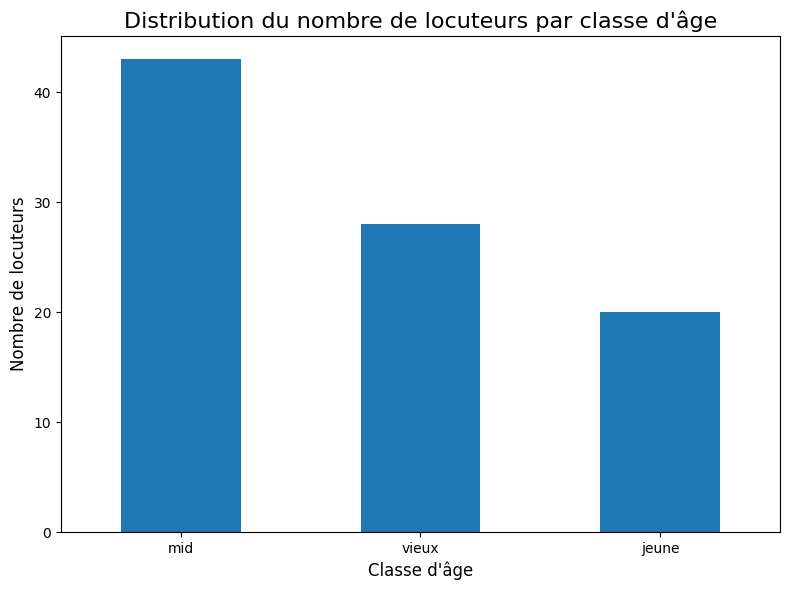

In [14]:
# graph représentation de la répartition des classes d'age 

class_names = {1: "jeune", 2: "mid", 3: "vieux"}
value_counts = metadata_fichier['classe_age'].value_counts()
value_counts.index = value_counts.index.map(class_names)
# ax = metadata_fichier['classe_age'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 6))
ax = value_counts.plot(kind='bar', figsize=(8, 6))
ax.set_title("Distribution du nombre de locuteurs par classe d'âge", fontsize=16)
ax.set_xlabel("Classe d'âge", fontsize=12)
ax.set_ylabel("Nombre de locuteurs", fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

{'jeune': 23802, 'mid': 66240, 'vieux': 34853}


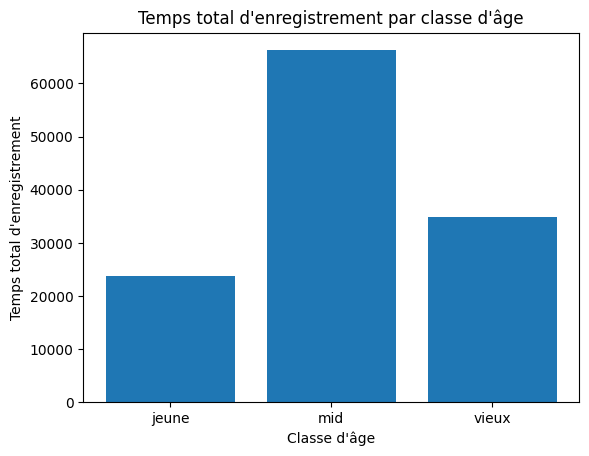

In [17]:
# dico et graphe de Temps par classe d'age

dico_temps = {'jeune': 0, 'mid': 0, 'vieux': 0}
for row in metadata_fichier.itertuples():
	temps_liste = row[4].split(':')
	temps = int(temps_liste[0])*60 + int(temps_liste[1])
	if row.classe_age == 1:
		dico_temps['jeune'] += temps
	elif row.classe_age == 2:
		dico_temps['mid'] += temps
	elif row.classe_age == 3:
		dico_temps['vieux'] += temps

print(dico_temps)
plt.bar(dico_temps.keys(), dico_temps.values())
plt.title("Temps total d'enregistrement par classe d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("Temps total d'enregistrement")
plt.show()

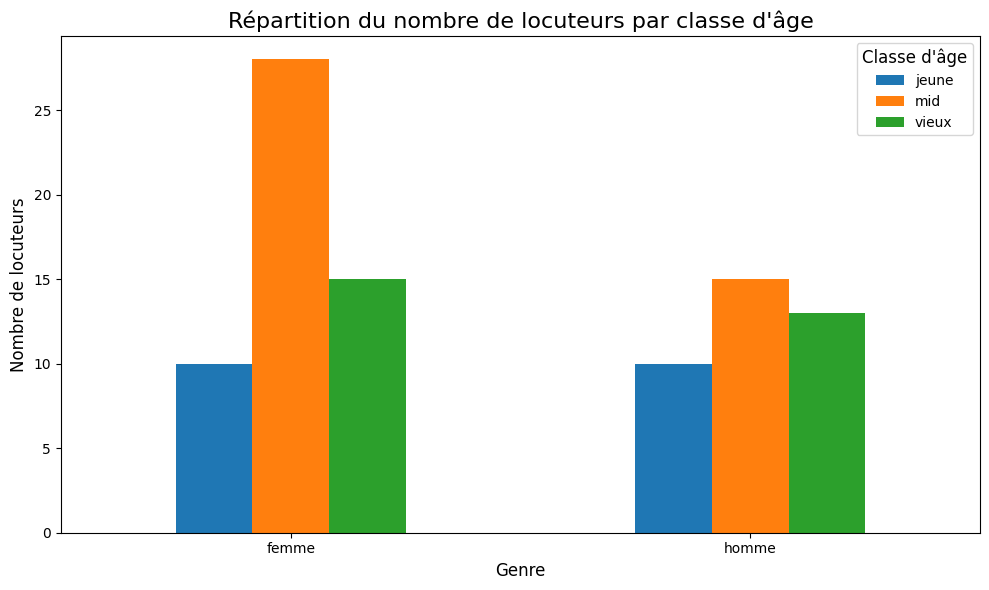

In [21]:
# répartition des classes d'age par sexe
# Group by 'sexe' and 'classe_age', count, and unstack
grouped_data = metadata_fichier.groupby(['sexe', 'classe_age']).size().unstack()

# Rename columns using the class names
grouped_data.columns = grouped_data.columns.map(class_names)

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
ax.set_title("Répartition du nombre de locuteurs par classe d'âge", fontsize=16)
ax.set_xlabel("Genre", fontsize=12)
ax.set_ylabel("Nombre de locuteurs", fontsize=12)

# Adding a legend for the age classes
ax.legend(title="Classe d'âge", fontsize=10, title_fontsize=12)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=0)

# Displaying the plot
plt.tight_layout()
plt.show()
